<a href="https://colab.research.google.com/github/SumeyyeBulutt/SumeyyeBulutt/blob/main/makine_pgrenmesi_SumeyyeBulut_vize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ÖĞRENCİNİN ADI SOYADI: SÜMEYYE BULUT
*   ÖĞRENCİ NO: 20040301011
*   BÖLÜM: YAZILIM MÜHENDİSLİĞİ
*   ÖĞRETMEN: Dr. Öğr. Üyesi GÖKALP TULUM
*   DERS: MAKİNE ÖĞRENMESİ





In [48]:
!git clone <makine_ogrenmesi_vize>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <makine_ogrenmesi_vize>'


In [20]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

filename = list(uploaded.keys())[0]

diabetes_df = pd.read_csv(filename)

print(diabetes_df.head())


Saving diabetes.csv to diabetes (1).csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

diabetes_df = pd.read_csv("diabetes.csv")

X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Veri setimizi yükledik. 'Outcome' sütunu yani 0 ve 1 ' lerin olduğu sütunu hedef değişken olarak aldık. Z-score standardizasyonu ile nomalizasyon yaptık. Çünkü;
Standart normalizasyon, her bir özelliğin değerlerini ortalamanın 0 ve standart sapmanın 1 olduğu bir dağılıma dönüştürür. Bu sayede veri setindeki özelliklerin orijinal dağılımlarını koruyarak veri kaybını önlemiş olur.
Standart normalizasyon bir çok makine öğrenimi algoritması için ön işleme adımı olarak tercih edilir. Lineer regresyon, lojistik regresyon gibi algoritmalar standartlaştırılmış veri setleri üzerinde daha iyi performans gösterebilir.

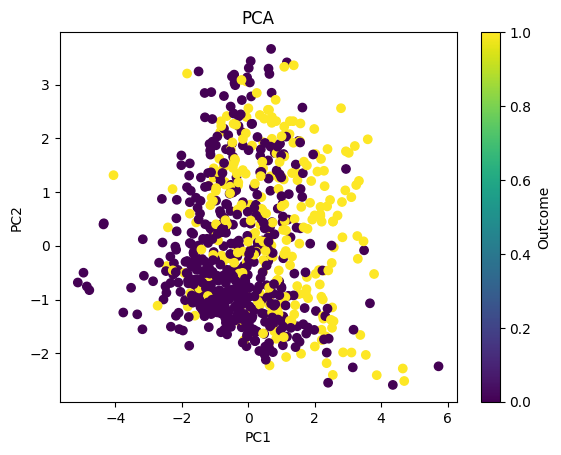

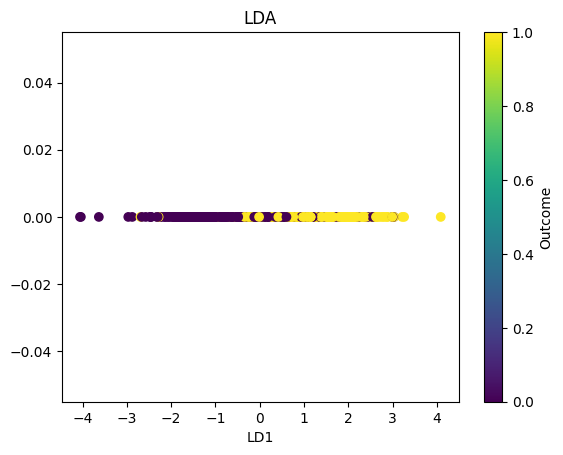

PCA:
[[5 3]
 [7 0]]
LDA:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_normalized, y)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Outcome')
plt.show()

plt.figure()
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='viridis')
plt.title('LDA')
plt.xlabel('LD1')
plt.colorbar(label='Outcome')
plt.show()

print("PCA:")
print(pca.components_.argsort()[:, ::-1][:, :2])
print("LDA:")
print(lda.scalings_.argsort()[:, ::-1][:, :2])

Çıktımız PCA ve LDA tarafından tespit edilen en ayırt edici özniteliklerin indislerini gösteriyor. En yüksek değere sahip iki öz değer için boyut indirgeme yapmak demek; PCA ve LDA kulllanarak veri setinin boyutunu azaltırken en fazla bilgiyi korumaya ve en önemli özelliklere odaklanmaya çalışmak anlamına gelir. Bu sayede veri setinin karmaşıklığını azaltarak daha anlaşılır bir şekilde analiz etmemizi sağlar. PCA için; birinci bileşen için en önemli özellik 5 ve 3 iken ikinci bileşen için en önemli özellikler 7 ve 0 olarak çıktı. LDA için; her bir sınıflandırıcı için sıralı özellik indislerini veriyor ve her bir sınıflandırıcı için sırasıyla 0,1,2,3,4,5,6,7. özelliklerin ağırlıklarının belirsiz olduğunu gösteriyor. Yani belirli sıralı özellikler yerine tüm özellikler eşit derecede önemli diyor bize.


Yukarıdaki kodda Standardizasyon(Z-score normalizasyonu) yapmıştık. Aşağıdaki kodda da normalizasyon yöntemimizi değiştirip Min-Max normalizasyonunu kullanacağız. Bu sayede normalizasyon yöntemi sonucu etkiliyor mu göreceğiz.


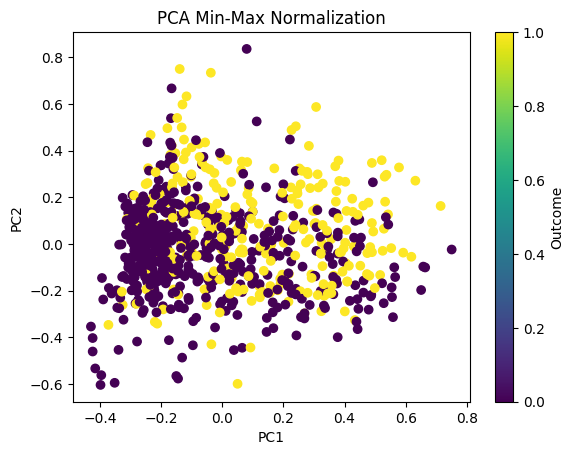

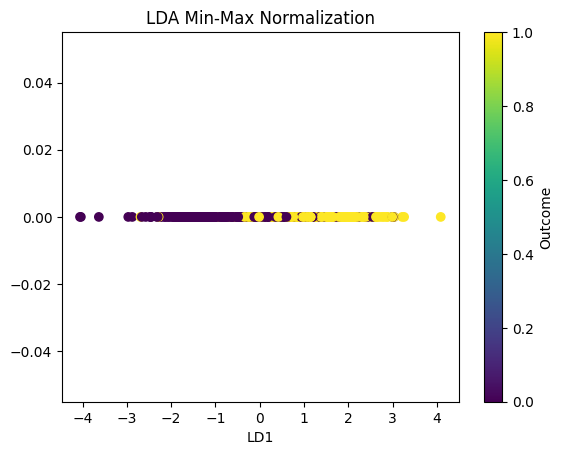

PCA:
[[7 0]
 [3 4]]
LDA:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

diabetes_df = pd.read_csv("diabetes.csv")

X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_normalized, y)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Min-Max Normalization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Outcome')
plt.show()

plt.figure()
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='viridis')
plt.title('LDA Min-Max Normalization')
plt.xlabel('LD1')
plt.colorbar(label='Outcome')
plt.show()

print("PCA:")
print(pca.components_.argsort()[:, ::-1][:, :2])
print("LDA:")
print(lda.scalings_.argsort()[:, ::-1][:, :2])


Standardizasyon, her bir özniteliği, özniteliklerin ortalaması sıfır ve standart sapması bir olan bir normal dağılıma dönüştürür. Bu nedenle, PCA ve LDA sonuçları standart sapma ölçeği üzerinde hesaplanır. Min-max normalizasyonu, her bir özniteliği belirli bir aralığa dönüştürür (genellikle [0, 1] veya [-1, 1]). Bu durumda, PCA ve LDA sonuçları, her bir bileşenin özellikler arasındaki farklılığı veya sınıflar arasındaki ayrımı gösterir. Özelliklerin farklılıkları, özelliklerin min-max ölçeği üzerinde hesaplanır. Hangi yöntemin kullanılması gerektiğine veri setinin özelliklerine ve kullanılacak algoritmanın gereksinimlerine bakıp karar verilir.


ANA VERİ SETİNE ÇOKLU DOĞRUSAL REGRESYON ANALİZİ

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)
coefficients_lm = lm.coef_
intercept_lm = lm.intercept_

print("Çoklu Doğrusal Regresyon Analizi Katsayıları:")
print(coefficients_lm)
print("Çoklu Doğrusal Regresyon Analizi Denklemi:")
equation_lm = f"y = {intercept_lm:.2f} + "
for i, coef in enumerate(coefficients_lm):
    equation_lm += f"({coef:.2f} * X{i}) + "
equation_lm = equation_lm[:-3]
print(equation_lm)

y_pred_lm = lm.predict(X_test)
accuracy_lm = accuracy_score(y_test, y_pred_lm.round())
conf_matrix_lm = confusion_matrix(y_test, y_pred_lm.round())

print("\nÇoklu Doğrusal Regresyon Analizi Performansı:")
print("Accuracy:", accuracy_lm)
print("Confusion Matrix:")
print(conf_matrix_lm)
print(classification_report(y_test, y_pred_lm.round()))


Çoklu Doğrusal Regresyon Analizi Katsayıları:
[ 0.03028606  0.18345471 -0.03309902 -0.0040366  -0.01456877  0.12743121
  0.02413868  0.07362405]
Çoklu Doğrusal Regresyon Analizi Denklemi:
y = 0.35 + (0.03 * X0) + (0.18 * X1) + (-0.03 * X2) + (-0.00 * X3) + (-0.01 * X4) + (0.13 * X5) + (0.02 * X6) + (0.07 * X7)

Çoklu Doğrusal Regresyon Analizi Performansı:
Accuracy: 0.7316017316017316
Confusion Matrix:
[[121  30]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



Çoklu Doğrusal Regresyon Analizi Katsayıları:
Her bir bağımsız değişken (X0, X1...X7) için model tarafından hesaplanan katsayılar (ağırlıklar) verilmiştir. Bu katsayılar, ilgili özelliğin hedef değişken üzerindeki etkisinin gücünü ve yönünü gösterir. Örneğin, X1 için katsayı 0.18345471 olduğunda, bu özelliğin değeri bir birim arttığında hedef değişkenin değerinin yaklaşık 0.183 birim artması beklenir.

Modelin tam denklemi verilmiştir. Bu denklem, bağımsız değişkenlerin (X0, X1, ..., X7) belirli katsayılarla çarpıldığı ve bir kesme terimi (intercept; bu örnekte yaklaşık 0.35) eklendiği lineer bir denklemdir. Model bu denklemi kullanarak yeni veriler üzerinde tahminler yapar.

Accuracy (Doğruluk): Modelin, hem pozitif hem de negatif sınıfları doğru sınıflandırma yeteneğinin bir ölçüsü olarak, tahminlerin gerçek değerlerle ne kadar uyumlu olduğunu gösterir. Bu durumda yaklaşık %73.16'dır.

Confusion Matrix (Karışıklık Matrisi): Modelin performansını daha detaylı anlamamızı sağlar. Bu matris, modelin gerçek pozitif, gerçek negatif, yanlış pozitif ve yanlış negatif değerlerini gösterir. Bu örnekte, 121 gerçek pozitif, 30 yanlış negatif, 32 yanlış pozitif ve 48 gerçek negatif tahmin yapılmıştır.

Diğer metrikler (precision, recall, f1-score): Modelin sınıf bazında performansını detaylı bir şekilde gösterir. Precision pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu, recall ise gerçekten pozitif olan örneklerin ne kadarının doğru tahmin edildiğini gösterir. F1-score, precision ve recall'un harmonik ortalamasıdır ve dengeli bir performans ölçüsü sağlar.

ANA VERİ SETİNE MULTİNOMİNAL LOJİSTİK REGRESYON ANALİZİ

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
coefficients_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

print("\nMultinominal Lojistik Regresyon Analizi Katsayıları:")
print(coefficients_logreg)
print("Multinominal Lojistik Regresyon Analizi Denklemi:")
equation_logreg = f"y = {intercept_logreg[0]:.2f} + "
for i, coef in enumerate(coefficients_logreg[0]):
    equation_logreg += f"({coef:.2f} * X{i}) + "
equation_logreg = equation_logreg[:-3]
print(equation_logreg)

y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("\nMultinominal Lojistik Regresyon Analizi Performansı:")
print("Accuracy:", accuracy_logreg)
print("Confusion Matrix:")
print(conf_matrix_logreg)
print(classification_report(y_test, y_pred_logreg))



Multinominal Lojistik Regresyon Analizi Katsayıları:
[[ 0.0974346   0.56665469 -0.10205008 -0.01253724 -0.05452391  0.42437159
   0.06975639  0.2097306 ]]
Multinominal Lojistik Regresyon Analizi Denklemi:
y = -0.43 + (0.10 * X0) + (0.57 * X1) + (-0.10 * X2) + (-0.01 * X3) + (-0.05 * X4) + (0.42 * X5) + (0.07 * X6) + (0.21 * X7)

Multinominal Lojistik Regresyon Analizi Performansı:
Accuracy: 0.7359307359307359
Confusion Matrix:
[[120  31]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Modelin öğrendiği katsayılar, bağımsız değişkenlerin (X0, X1, ..., X7) modelin çıktısı üzerindeki etkisini gösterir. Örneğin, X1 değişkeninin katsayısı 0.56675123'tür, bu da X1'in değeri bir birim arttığında, bağımlı değişkenin (y'nin) log-şansının yaklaşık 0.57 birim artacağını gösterir (diğer tüm değişkenler sabit tutulduğunda).

Bu denklem, modelin nasıl tahminler yaptığını gösterir. Kesme terimi (-0.43) ve her bir bağımsız değişkenin katsayıları, bir tahmin yapılırken nasıl bir araya geldiklerini gösterir. Bu denklem, her bir özelliğin (X0, X1...X7) modelin tahminine katkısını ve nasıl birleştirildiklerini ifade eder.

Accuracy (Doğruluk): Modelin, test veri setindeki tüm tahminlerin ne kadarının doğru olduğunu gösterir. Burada, %73.59 olarak hesaplanmıştır, yani modelin tahminleri %73.59 oranında doğrudur.

Confusion Matrix (Karışıklık Matrisi):
Modelin gerçek pozitifleri (120), yanlış negatifleri (31), yanlış pozitifleri (30) ve gerçek negatifleri (50) sayısını gösterir.
Bu matris, modelin sınıfları nasıl ayırt ettiğini ve sık yapılan hataları gösterir.

Classification Report (Sınıflandırma Raporu):
Precision (Kesinlik): Pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranı. Sıfır sınıfı için %80, bir sınıfı için %62.

Recall (Duyarlılık): Gerçek pozitifler arasında doğru olarak pozitif tahmin edilenlerin oranı. Sıfır sınıfı için %79, bir sınıfı için %62.

F1-score: Kesinlik ve duyarlılığın harmonik ortalaması. Her iki sınıf için de hesaplanmıştır.

Support: Test setindeki her sınıfın örnek sayısı. Sıfır sınıfı için 151, bir sınıfı için 80.

PCA UYGULANMIŞ TRANSFORMASYON ÖZNİTELİK MATRİSİNE MULTİNOMİNAL LOJİSTİK REGRESYON ANALİZİ

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

logreg_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_pca.fit(X_pca_train, y_train)
coefficients_logreg_pca = logreg_pca.coef_
intercept_logreg_pca = logreg_pca.intercept_

print("\nMultinominal Lojistik Regresyon Analizi Katsayıları (PCA):")
print(coefficients_logreg_pca)
print("Multinominal Lojistik Regresyon Analizi Denklemi (PCA):")
print("y =", " + ".join([f"{coefficients_logreg_pca[i]}*PC{i+1}" for i in range(len(coefficients_logreg_pca))]), "+", intercept_logreg_pca)

y_pred_logreg_pca = logreg_pca.predict(X_pca_test)
accuracy_logreg_pca = accuracy_score(y_test, y_pred_logreg_pca)
conf_matrix_logreg_pca = confusion_matrix(y_test, y_pred_logreg_pca)

print("\nMultinominal Lojistik Regresyon Analizi Performansı (PCA):")
print("Accuracy:", accuracy_logreg_pca)
print("Confusion Matrix:")
print(conf_matrix_logreg_pca)
print(classification_report(y_test, y_pred_logreg_pca))



Multinominal Lojistik Regresyon Analizi Katsayıları (PCA):
[[ 0.0974346   0.56665469 -0.10205008 -0.01253724 -0.05452391  0.42437159
   0.06975639  0.2097306 ]]
Multinominal Lojistik Regresyon Analizi Denklemi (PCA):
y = [ 0.0974346   0.56665469 -0.10205008 -0.01253724 -0.05452391  0.42437159
  0.06975639  0.2097306 ]*PC1 + [-0.43020116]

Multinominal Lojistik Regresyon Analizi Performansı (PCA):
Accuracy: 0.7359307359307359
Confusion Matrix:
[[120  31]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Model, PCA uygulanmış özellikler (PC1, PC2...PC8) kullanılarak eğitilmiştir. Her bir özelliğin katsayıları (ağırlıkları), modelin o özelliği nasıl değerlendirdiğini gösterir. Yüksek bir katsayı, o özelliğin modelin kararını daha fazla etkilediğini gösterir. Katsayılar ve sabit(intercept), modelin eğitim sürecinde öğrendiği parametrelerdir.

Model denklemi, her bir PCA özelliğinin katsayıları ile çarpıldığı ve sonucun bir kesme değeriyle toplandığı lineer bir denklemdir. Bu denklem, modelin bir tahmin yapmak için kullandığı formüldür.

Accuracy (Doğruluk): Modelin, hem pozitif hem de negatif sınıfları doğru tahmin etme oranıdır. Burada %73.59 olarak hesaplanmıştır, yani modelin tahminlerinin yaklaşık %74'ü doğrudur.

Confusion Matrix (Karışıklık Matrisi):
True Positive (TP): Gerçekte pozitif olan ve pozitif olarak tahmin edilen veri sayısı (50).
True Negative (TN): Gerçekte negatif olan ve negatif olarak tahmin edilen veri sayısı (120).
False Positive (FP): Gerçekte negatif olan ancak pozitif olarak tahmin edilen veri sayısı (31).
False Negative (FN): Gerçekte pozitif olup negatif olarak tahmin edilen veri sayısı (30).

Precision: Pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranı.

Recall: Gerçekte pozitif olanların, pozitif olarak doğru tahmin edilme oranı.

F1-Score: Precision ve recall'un harmonik ortalamasıdır ve genel bir performans ölçüsü olarak kullanılır.

Bu metrikler, sınıf 0 (TN) ve sınıf 1 (TP) için ayrı ayrı hesaplanmış.


PCA UYGULANMIŞ TRANSFORMASYON ÖZNİTELİK MATRİSİNE ÇOKLU DOĞRUSAL REGRESYON ANALİZİ

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)


lm_pca = LinearRegression()
lm_pca.fit(X_pca_train, y_train)
coefficients_lm_pca = lm_pca.coef_
intercept_lm_pca = lm_pca.intercept_


print("\nÇoklu Doğrusal Regresyon Analizi Katsayıları (PCA):")
print(coefficients_lm_pca)
print("Çoklu Doğrusal Regresyon Analizi Denklemi (PCA):")
print("y =", " + ".join([f"{coefficients_lm_pca[i]}*PC{i+1}" for i in range(len(coefficients_lm_pca))]), "+", intercept_lm_pca)


y_pred_lm_pca = lm_pca.predict(X_pca_test)
mse_lm_pca = mean_squared_error(y_test, y_pred_lm_pca)

print("\nÇoklu Doğrusal Regresyon Analizi Performansı (PCA):")
print("Mean Squared Error:", mse_lm_pca)



Çoklu Doğrusal Regresyon Analizi Katsayıları (PCA):
[ 0.03028606  0.18345471 -0.03309902 -0.0040366  -0.01456877  0.12743121
  0.02413868  0.07362405]
Çoklu Doğrusal Regresyon Analizi Denklemi (PCA):
y = 0.030286058204009605*PC1 + 0.18345470727479965*PC2 + -0.03309901685635035*PC3 + -0.004036604067121339*PC4 + -0.014568774383350948*PC5 + 0.1274312146112828*PC6 + 0.024138682471447834*PC7 + 0.0736240479334222*PC8 + 0.3538519202823697

Çoklu Doğrusal Regresyon Analizi Performansı (PCA):
Mean Squared Error: 0.17603335005142032


Çoklu doğrusal regresyon analizi için konfüzyon matrisi hesaplanmaz çünkü çoklu doğrusal regresyon sınıflandrıma problemleri için değil sürekli çıktı değişkeni olan regresyon problemleri için kullanılır. Bu yüzden doğruluk, hassasiyet, geri çağırma gibi sınıflandırma metrikleri yerine regresyon metrikleri olan ortalama karesel hata(MSE) gibi metrikleri kullanır.

Katsayılarımız her bir temel bileşenin(PC1,PC2..PC8) çıktı değişkeni üzerindeki etkisini ölçüyor.  Bu katsayılar, modelin çıktıyı tahmin ederken her bir bileşen için kullandığı ağırlıkları temsil eder. Pozitif bir katsayı, o bileşenin değeri arttıkça çıktının da arttığını gösterirken, negatif bir katsayı ters bir ilişkiyi gösterir.
Sabit (Intercept): 0.35385192 değeri, modelin, tüm girdi öznitelikleri sıfır olduğunda tahmin ettiği çıktı değeri. Bu değer, modelin regresyon denklemindeki sabittir.
Regresyon denklemi, bu katsayıları ve sabiti kullanarak, verilen girdi özniteliklerine (temel bileşenler) dayanarak çıktıyı (yani diabetes durumu) tahmin etmek için kullanılan matematiksel bir ifadedir. Regresyon denklemi şöyledir:

y=0.03028606×PC1+0.18345471×PC2+⋯+0.07362405×PC8+0.35385192

MSE (Mean Squared Error): Modelin tahminlerinin ne kadar iyi olduğunu ölçer. Gerçek değerler ile modelin tahmin ettiği değerler arasındaki farkların karelerinin ortalaması alınarak hesaplanır. MSE, hata metriklerinden biridir ve değeri ne kadar düşükse model o kadar iyi performans göstermiş olur. Burada MSE değeri 0.17603335005142032'dir, bu da modelin tahminlerinin gerçek değerlerle arasındaki ortalama kare farkının bu değer olduğunu gösterir.

ANA VERİ SETİNE KARAR AĞACI SINIFLANDIRMA ANALİZİ


Karar Ağacı Sınıflandırma Performansı:
Accuracy: 0.7012987012987013
Confusion Matrix:
[[107  44]
 [ 25  55]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231


Performans Metrikleri:
Duyarlılık (Sensitivity): 0.6875
Özgünlük (Specificity): 0.7086092715231788
Doğruluk (Accuracy): 0.7012987012987013
F1-Skoru: 0.6145251396648045


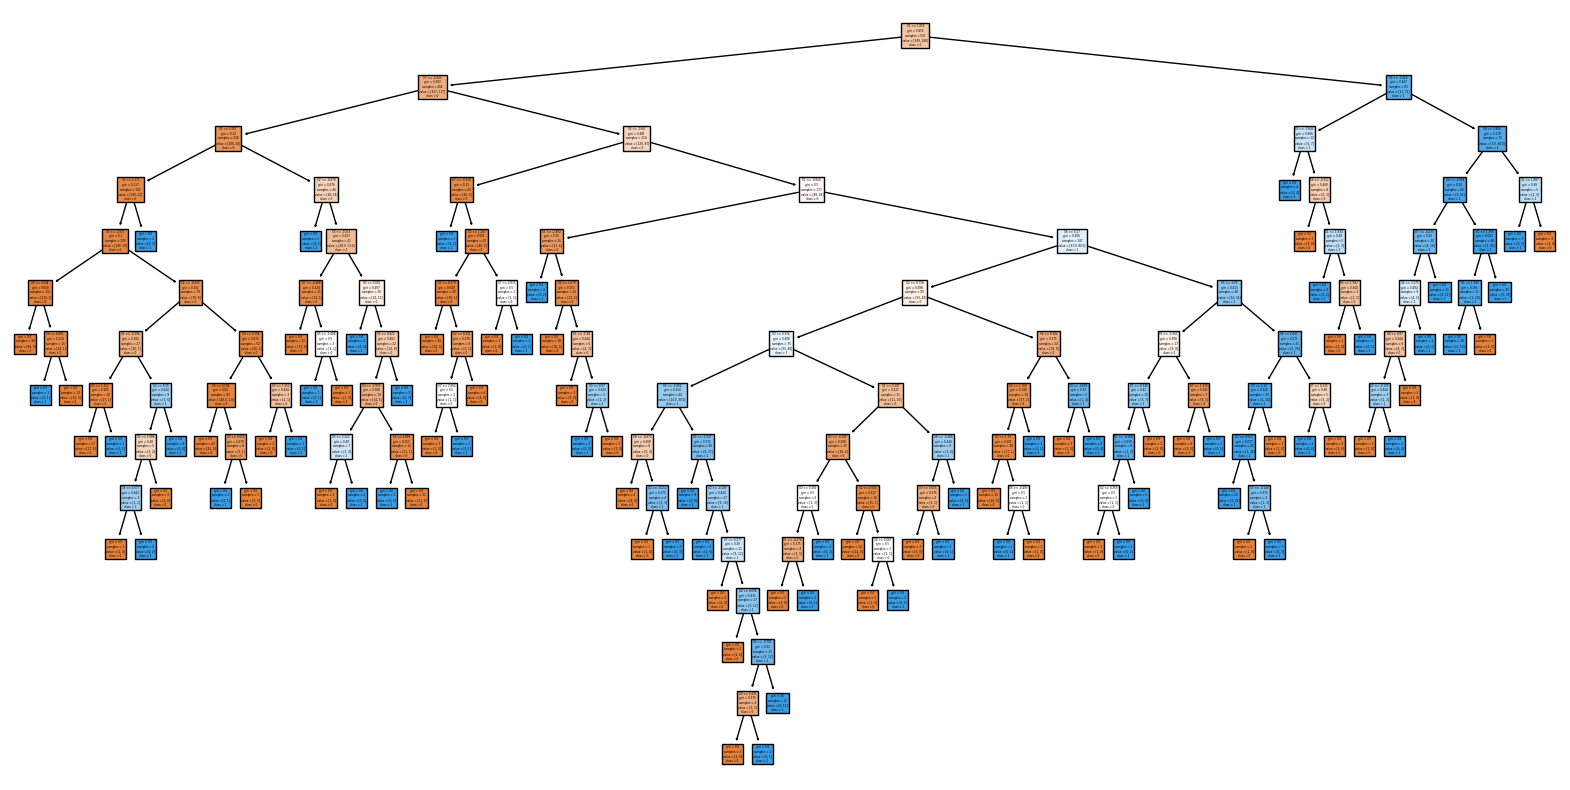

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nKarar Ağacı Sınıflandırma Performansı:")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)
print(classification_report(y_test, y_pred_dt))


TN = conf_matrix_dt[0, 0]
FP = conf_matrix_dt[0, 1]
FN = conf_matrix_dt[1, 0]
TP = conf_matrix_dt[1, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = sensitivity
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nPerformans Metrikleri:")
print("Duyarlılık (Sensitivity):", sensitivity)
print("Özgünlük (Specificity):", specificity)
print("Doğruluk (Accuracy):", accuracy)
print("F1-Skoru:", f1_score)


plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=['X'+str(i) for i in range(X.shape[1])], class_names=['0', '1'])
plt.show()


Accuracy (Doğruluk): 0.7013 olarak verilmiştir. Bu, modelin doğru sınıflandırılan örneklerin toplam örnekler içindeki oranını ifade eder. Yani, doğru sınıflandırılanların toplam sayıya oranıdır.
Confusion Matrix (Karmaşıklık Matrisi):
Gerçek negatiflerin sayısı (TN): 107
Yanlış pozitiflerin sayısı (FP): 44
Yanlış negatiflerin sayısı (FN): 25
Gerçek pozitiflerin sayısı (TP): 55
Bu matris, sınıflandırma modelinin tahminlerini gerçek sınıflandırma sonuçlarıyla karşılaştırır.
Precision (Kesinlik): 0.56 olarak verilmiştir. Pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterir.
Recall (Duyarlılık): 0.69 olarak verilmiştir. Gerçek pozitif örneklerin ne kadarının pozitif olarak tahmin edildiğini gösterir.
F1-Score (F1-Skoru): 0.61 olarak verilmiştir. Hassasiyet ve duyarlılık arasındaki dengeyi ölçen bir metriktir. Hassasiyet ve duyarlılık arasındaki harmonik ortalama olarak hesaplanır.

Performans Metrikleri:
Duyarlılık (Sensitivity): 0.6875 olarak hesaplanmıştır. Gerçek pozitiflerin ne kadarının doğru bir şekilde sınıflandırıldığını ifade eder.
Özgünlük (Specificity): 0.7086 olarak hesaplanmıştır. Gerçek negatiflerin ne kadarının doğru bir şekilde sınıflandırıldığını ifade eder.
Doğruluk (Accuracy): 0.7013 olarak hesaplanmıştır. Modelin doğru sınıflandırılan örneklerin toplam örnekler içindeki oranını ifade eder.
F1-Skoru: 0.6145 olarak hesaplanmıştır. Hassasiyet ve duyarlılık arasındaki dengeyi ölçer.

Ağaç görselimiz, her bir düğümdeki kararları, dallanma kriterlerini ve yaprak düğümlerdeki sınıf dağılımlarını gösterir, böylece modelin karar verme sürecini anlarız.

PCA UYGULANMIŞ TRANSFORMASYON ÖZNİTELİK MATRİSİNE KARAR AĞACI SINIFLANDIRMA ANALİZİ

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

diabetes_df = pd.read_csv("diabetes.csv")

X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("\nKarar Ağacı Sınıflandırma Performansı (PCA):")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix (PCA):")
print(conf_matrix_dt)
print("RAPOR (PCA):")
print(classification_rep_dt)




Karar Ağacı Sınıflandırma Performansı (PCA):
Accuracy: 0.6147186147186147
Confusion Matrix (PCA):
[[100  51]
 [ 38  42]]
RAPOR (PCA):
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       151
           1       0.45      0.53      0.49        80

    accuracy                           0.61       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.63      0.61      0.62       231



Accuracy (Doğruluk): Modelin doğru tahminlerin toplam gözlem sayısına oranıdır. Bu model için doğruluk oranı yaklaşık %61.47'dir.

Confusion Matrix (Karmaşıklık Matrisi): Karar ağacı modelinin tahminlerini gerçek sınıflarla karşılaştırır. Gerçek negatifler (TN): 100
Yanlış pozitifler (FP): 51
Yanlış negatifler (FN): 38
Gerçek pozitifler (TP): 42

Precision (Kesinlik): Modelin pozitif olarak tahminlediği vakaların gerçekte pozitif olma oranıdır. 0 sınıfı için kesinlik 0.72, 1 sınıfı için ise 0.45'tir.

Recall (Duyarlılık): Gerçek pozitif vakaların kaçının doğru bir şekilde tahmin edildiğini gösterir. 0 sınıfı için duyarlılık 0.66, 1 sınıfı için ise 0.53'tür.

F1-score: Kesinlik ve duyarlılığın harmonik ortalamasıdır. 0 sınıfı için f1-score 0.69, 1 sınıfı için ise 0.49'dur.

Support: Her bir sınıfın gerçek gözlem sayısını gösterir.

Accuracy: Modelin doğru sınıflandırma oranıdır. Bu model için doğruluk oranı %61'dir.






ANA VERİ SETİNE NAİVE BAYES SINIFLANDIRICISI ANALİZİ

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nNaive Bayes Sınıflandırma Performansı:")
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)
print(classification_report(y_test, y_pred_nb))


TN = conf_matrix_nb[0, 0]
FP = conf_matrix_nb[0, 1]
FN = conf_matrix_nb[1, 0]
TP = conf_matrix_nb[1, 1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = sensitivity
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nPerformans Metrikleri:")
print("Duyarlılık (Sensitivity):", sensitivity)
print("Özgünlük (Specificity):", specificity)
print("Doğruluk (Accuracy):", accuracy)
print("F1-Skoru:", f1_score)



Naive Bayes Sınıflandırma Performansı:
Accuracy: 0.7445887445887446
Confusion Matrix:
[[119  32]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231


Performans Metrikleri:
Duyarlılık (Sensitivity): 0.6625
Özgünlük (Specificity): 0.7880794701986755
Doğruluk (Accuracy): 0.7445887445887446
F1-Skoru: 0.6424242424242423


Accuracy (Doğruluk): Toplam doğru tahminlerin toplam örnek sayısına oranıdır. Bu durumda, doğruluk yaklaşık olarak %74.46'dır. Yani, tüm tahminlerin yaklaşık %74.46'sı doğru yapılmıştır.

Confusion Matrix (Karmaşıklık Matrisi): Bu matris, sınıflandırma modelinin gerçek ve tahmin edilen sınıflar arasındaki performansını gösterir. Pozitif sınıf (1) ve negatif sınıf (0) için gerçek ve tahmin edilen değerlerin kombinasyonunu içerir.

Gerçek negatif (0) sınıfların sayısı, doğru tahmin edilenlerin sayısıdır. (119)
Gerçek negatif (0) sınıfların sayısı, yanlış tahmin edilen pozitif (1) sınıfların sayısıdır. (32)
Gerçek pozitif (1) sınıfların sayısı, yanlış tahmin edilen negatif (0) sınıfların sayısıdır. (27)
Gerçek pozitif (1) sınıfların sayısı, doğru tahmin edilenlerin sayısıdır. (53)

Precision, sınıflandırıcının doğru tahmin ettiği pozitif sınıfların oranını, recall ise gerçek pozitif sınıfların doğru bir şekilde tahmin edilme oranını ölçer. F1-score, precision ve recall'in harmonik ortalamasıdır ve dengelenmiş bir metrik sağlar. Support, her bir sınıfın gerçek örnek sayısını ifade eder.

Duyarlılık (Sensitivity): Gerçek pozitif sınıfların doğru bir şekilde tahmin edilme oranını ölçer. Bu durumda, duyarlılık yaklaşık olarak %66.25'tir.
Özgünlük (Specificity): Gerçek negatif sınıfların doğru bir şekilde tahmin edilme oranını ölçer. Bu durumda, özgünlük yaklaşık olarak %78.81'dir.
F1-Skoru: Precision ve recall'in harmonik ortalamasıdır. Bu durumda, F1-skoru yaklaşık olarak %64.24'tür. F1-skoru, hem precision hem de recall'in iyi olduğu durumlarda yüksek olur.

PCA UYGULANMIŞ TRANSFORMASYON ÖZNİTELİK MATRİSİNE NAİVE BAYES SINIFLANDIRICISI ANALİZİ

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


diabetes_df = pd.read_csv("diabetes.csv")


X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print("\nNaive Bayes Sınıflandırma Performansı (PCA):")
print("Accuracy:", accuracy_nb)
print("Confusion Matrix (PCA):")
print(conf_matrix_nb)
print("RAPOR (PCA):")
print(classification_rep_nb)



Naive Bayes Sınıflandırma Performansı (PCA):
Accuracy: 0.70995670995671
Confusion Matrix (PCA):
[[126  25]
 [ 42  38]]
RAPOR (PCA):
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       151
           1       0.60      0.47      0.53        80

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.70      0.71      0.70       231



Accuracy (Doğruluk): Modelin doğru tahmin ettiği örneklerin oranıdır. Bu durumda, 0.71 veya %71'dir.
Confusion Matrix (Karmaşıklık Matrisi): Gerçek sınıf değerlerine göre modelin tahminlerini gösterir.

Precision (Kesinlik): Pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterir.

Recall (Duyarlılık): Gerçek pozitiflerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir. Diğer bir deyişle, gerçek pozitiflerin tüm pozitifler içindeki oranıdır.

F1-score: Precision ve recall metriklerinin harmonik ortalamasıdır. Dengeli bir sınıflandırma performansını değerlendirir.

Support (Destek): Her sınıf için gözlemlenen örnek sayısını temsil eder.